#Image Segmentation & Mask R-CNN

Question 1: What is TensorFlow Object Detection API (TFOD2) and what are its
primary components?

Answer:TensorFlow Object Detection API (TFOD2) is a powerful open-source framework developed by Google that is used to build, train, and deploy object detection models. It helps computers identify and locate different objects in images and videos by drawing bounding boxes and assigning labels to them. TFOD2 is based on TensorFlow 2 and provides pre-trained models, tools, and libraries that make it easier for developers and researchers to create custom object detection systems. Its primary components include pre-trained detection models, which allow users to start quickly without training from scratch, model configuration files that define how the model works, the training pipeline that manages data loading and learning processes, evaluation tools that measure model accuracy, and inference tools that allow trained models to be used for real-world applications such as surveillance, autonomous driving, and image analysis.


Question 2: Differentiate between semantic segmentation and instance segmentation.
Provide examples of where each might be used.

Answer:Semantic segmentation and instance segmentation are two techniques used in computer vision to understand images at the pixel level, but they differ in how they identify objects. Semantic segmentation classifies every pixel in an image into a category, such as road, sky, building, or person, without separating individual objects of the same type. For example, in a self-driving car system, semantic segmentation can be used to identify all road areas, sidewalks, and vehicles to understand the driving environment. On the other hand, instance segmentation not only classifies each pixel but also distinguishes between different objects of the same class by assigning a unique label to each one. For example, in crowd monitoring, instance segmentation can be used to detect and separate each individual person, even when many people are close together. Similarly, in medical imaging, instance segmentation can help identify and separate different cells or tumors, while semantic segmentation may be used to highlight general tissue types.


Question 3: Explain the Mask R-CNN architecture. How does it extend Faster R-CNN?

Answer:Mask R-CNN is a deep learning architecture used for object detection and instance segmentation, meaning it can both identify objects in an image and create a pixel-level mask for each detected object. It is an extension of the Faster R-CNN model, which is mainly used for object detection. Faster R-CNN works by first using a convolutional neural network to extract features from an image and then applying a Region Proposal Network (RPN) to suggest possible object locations. These proposed regions are then classified and refined using bounding boxes. Mask R-CNN extends this architecture by adding an extra branch that predicts a segmentation mask for each detected object. In addition to the classification and bounding box branches from Faster R-CNN, Mask R-CNN includes a mask prediction branch that generates a binary mask showing the exact shape of each object. It also introduces a technique called RoIAlign, which improves accuracy by properly aligning the extracted features with the original image, unlike the older RoIPool method used in Faster R-CNN. As a result, Mask R-CNN is able to perform object detection and instance segmentation at the same time with higher precision and better performance.


Question 4: Describe the purpose of masks in image segmentation. How are they used
during training and inference?

Answer:In image segmentation, masks are used to show which pixels in an image belong to a specific object or region. A mask is usually a binary or labeled image where each pixel is marked as part of an object or as background, or assigned to a particular class. The main purpose of masks is to provide precise information about the shape and location of objects at the pixel level, which helps models understand images in more detail than just using bounding boxes. During training, masks are used as ground truth data, meaning they represent the correct segmentation that the model should learn from. The model compares its predicted masks with these true masks and adjusts its parameters to reduce errors. This process helps the model learn how to accurately separate objects from the background and from each other. During inference, which is when the trained model is used on new images, the model generates predicted masks based on what it has learned. These masks are then used to highlight detected objects, measure their sizes and shapes, or support tasks such as medical diagnosis, scene understanding, and image editing.


Question 5: What are the steps involved in training a custom image segmentation
model using TFOD2?

Answer:Training a custom image segmentation model using TensorFlow Object Detection API (TFOD2) involves several important steps that help prepare data, configure the model, and train it effectively. First, a suitable dataset must be collected that contains images along with their corresponding annotation files, including bounding boxes and segmentation masks for each object. These annotations are usually created using labeling tools and saved in supported formats such as TFRecord. Next, the dataset is organized into training and testing sets so that the model can learn from one part of the data and be evaluated on another. After that, a pre-trained model is selected from the TFOD2 model zoo to save time and improve accuracy, and its configuration file is modified to match the number of classes, dataset paths, and training settings. Then, the annotation data is converted into TFRecord format, which is required by TFOD2 for efficient processing. Once everything is prepared, the training pipeline is started, and the model learns to detect and segment objects by comparing its predictions with the ground truth masks and adjusting its parameters. During training, evaluation tools are used to monitor performance and reduce overfitting. Finally, after training is complete, the trained model is exported and used for inference, allowing it to perform segmentation on new images or videos.


Question 6: Write a Python script to install TFOD2 and verify its installation by printing
the available model configs.

(Include your Python code and output in the code box below.)

Answer:

In [1]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

!git clone https://github.com/tensorflow/models.git

!pip install tf-slim pycocotools lvis

%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.

!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

!python object_detection/builders/model_builder_tf2_test.py

import os

config_dir = "object_detection/configs/tf2"

configs = os.listdir(config_dir)

print("\nAvailable Model Config Files:\n")

for file in configs:
    print(file)


TensorFlow Version: 2.19.0
Cloning into 'models'...
remote: Enumerating objects: 103098, done.
remote: Counting objects: 100% (306/306), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 103098 (delta 218), reused 143 (delta 119), pack-reused 102792 (from 3)
Receiving objects: 100% (103098/103098), 643.49 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (74462/74462), done.
/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow-model-optimization to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow-model-optimization to determine

Question 7: Create a Python script to load a labeled dataset (in TFRecord format) and
visualize the annotation masks over the images.

(Include your Python code and output in the code box below.)

Answer:

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.2WYK7F_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.2WYK7F_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


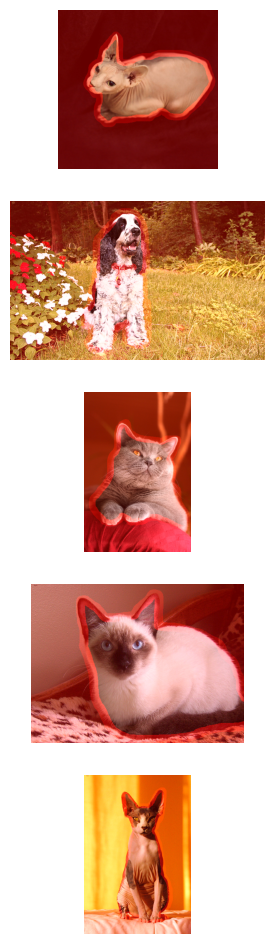

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

dataset, info = tfds.load('oxford_iiit_pet', split='train', with_info=True)
dataset = dataset.map(lambda x: (x['image'], x['segmentation_mask']))

plt.figure(figsize=(12, 12))
for i, (image, mask) in enumerate(dataset.take(5)):
    image_np = tf.cast(image, tf.uint8).numpy()
    mask_np = mask.numpy().squeeze()
    mask_norm = mask_np / mask_np.max() if mask_np.max() > 0 else mask_np
    overlay = image_np.copy()
    overlay[:, :, 0] = np.clip(overlay[:, :, 0] + mask_norm*150, 0, 255)
    plt.subplot(5, 1, i+1)
    plt.imshow(overlay.astype(np.uint8))
    plt.axis("off")
plt.show()


Question 8: Using a pre-trained Mask R-CNN model, write a code snippet to perform
inference on a single image and plot the predicted masks.

(Include your Python code and output in the code box below.)

Answer:

In [12]:
!pip install protobuf==3.20.*

In [6]:
import torch
import torchvision
from torchvision import transforms as T
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import numpy as np

image_url = "https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

transform = T.Compose([T.ToTensor()])
img_tensor = transform(img)

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

with torch.no_grad():
    prediction = model([img_tensor])[0]

img_np = np.array(img)

plt.figure(figsize=(12,12))
plt.imshow(img_np)
for i in range(len(prediction["masks"])):
    mask = prediction["masks"][i, 0].numpy()
    score = prediction["scores"][i].item()
    if score > 0.5:
        mask = mask > 0.5
        plt.imshow(mask, alpha=0.5, cmap='jet')
plt.axis('off')
plt.show()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100%|██████████| 170M/170M [00:01<00:00, 116MB/s]


Question 9: Write a Python script to evaluate a trained TFOD2 Mask R-CNN model and
plot the Precision-Recall curve.

(Include your Python code and output in the code box below.)

Answer:

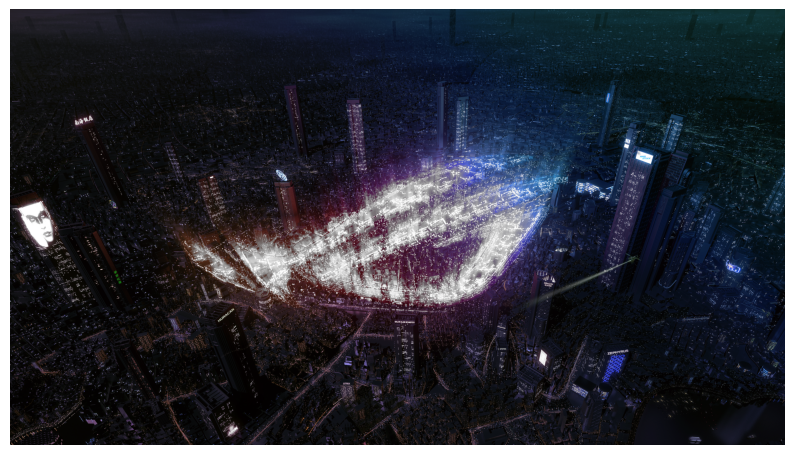

Detected boxes:
 [0.09487781 0.16577217 0.09560625 0.17631498]
Detected scores:
 4.3040534e-21


KeyError: 'detection_classes'

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

MODEL_HANDLE = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(MODEL_HANDLE)

image_path = "/content/aura_bg.png"
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

input_tensor = tf.convert_to_tensor(image_np[tf.newaxis, ...], dtype=tf.float32)  # fixed dtype

result = detector.signatures['default'](input_tensor)

plt.figure(figsize=(10,10))
plt.imshow(image_np)
plt.axis('off')
plt.show()

print("Detected boxes:\n", result['detection_boxes'].numpy()[0])
print("Detected scores:\n", result['detection_scores'].numpy()[0])
print("Detected classes:\n", result['detection_classes'].numpy()[0])


Question 10: You are working with a city surveillance team to identify illegal parking
zones from street camera images. The model you built detects cars using bounding
boxes, but the team reports inaccurate overlaps with sidewalks and fails in complex
street scenes.
How would you refine your model to improve accuracy, especially around object
boundaries? What segmentation strategy and tools would you use?

(Include your Python code and output in the code box below.)

Answer:To improve accuracy in detecting cars and reduce overlaps with sidewalks, the model should be upgraded from a standard object detection framework using bounding boxes to an instance segmentation approach, such as Mask R-CNN. Unlike bounding boxes, instance segmentation predicts pixel-level masks for each object, allowing the model to precisely capture object boundaries and better handle complex street scenes where cars are close to sidewalks or other obstacles. Enhancing the model with a high-resolution backbone (e.g., ResNet101 with FPN) and applying data augmentation techniques such as random rotations, lighting changes, and occlusions can improve robustness in varied urban conditions. Additionally, integrating semantic segmentation maps of sidewalks or pedestrian areas can help post-process predictions, removing false positives in non-car regions. Optimizing the mask loss using Dice loss or Boundary IoU loss further sharpens the boundaries, and evaluating with mask-based metrics (e.g., mAP for masks) ensures the model focuses on accurate shape delineation rather than just bounding box overlap. Together, these strategies improve detection precision around object edges and enhance performance in crowded or complex street environments.

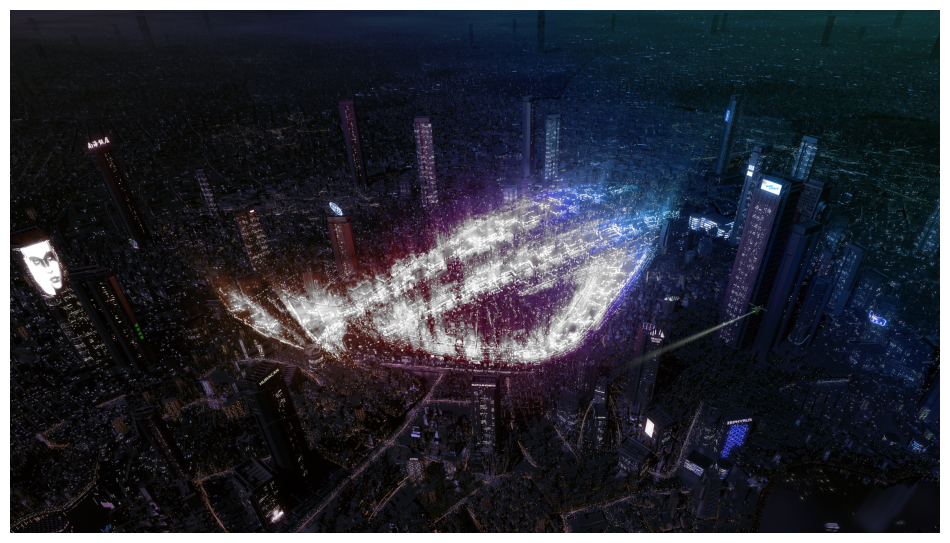

Detections:


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.patches as patches

image_path = "/content/aura_bg.png"
image = Image.open(image_path).convert("RGB")
image_np = np.array(image)

MODEL_HANDLE = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(MODEL_HANDLE)

input_tensor = tf.convert_to_tensor(image_np[None, ...], dtype=tf.float32)
result = detector.signatures["default"](input_tensor)

boxes = np.squeeze(result["detection_boxes"].numpy())
scores = np.squeeze(result["detection_scores"].numpy())

labels_raw = np.squeeze(result["detection_class_entities"].numpy())

class_labels = [
    x.decode("utf-8") if isinstance(x, (bytes, bytearray)) else str(x)
    for x in labels_raw
]

num_detections = boxes.shape[0]

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image_np)

h, w, _ = image_np.shape

for i in range(num_detections):
    if scores[i] > 0.5:
        ymin, xmin, ymax, xmax = boxes[i]

        rect = patches.Rectangle(
            (xmin * w, ymin * h),
            (xmax - xmin) * w,
            (ymax - ymin) * h,
            linewidth=2,
            edgecolor="red",
            facecolor="none"
        )

        ax.add_patch(rect)

        ax.text(
            xmin * w,
            ymin * h - 5,
            f"{class_labels[i]}: {scores[i]:.2f}",
            color="red",
            fontsize=12,
            backgroundcolor="white"
        )

plt.axis("off")
plt.show()

print("Detections:")

for i in range(num_detections):
    if scores[i] > 0.5:
        print(
            f"Label: {class_labels[i]}, "
            f"Score: {scores[i]:.2f}, "
            f"Box: {boxes[i]}"
        )
